In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, matthews_corrcoef, roc_auc_score, roc_curve

##ANN STUFF
from sklearn.neural_network import MLPClassifier        # The ANN model
from sklearn.preprocessing import StandardScaler        # To normalize features
from sklearn.metrics import accuracy_score              # To evaluate performance

import matplotlib.pyplot as plt


## Data piped from CSV

In [85]:
DATA_PATH = '../data/'
file_name = 'heart_og.csv'


heart_og_df = pd.read_csv(DATA_PATH+file_name)

# Displays the first 5 rows
heart_og_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Stuff (Pretty Pictures)

## Pre-processing

In [86]:
y = heart_og_df["target"]
X = heart_og_df.drop('target',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 21)
#first xtrain rows
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
935,56,1,1,120,240,0,1,169,0,0.0,0,0,2
736,59,1,0,110,239,0,0,142,1,1.2,1,1,3
405,56,1,2,130,256,1,0,142,1,0.6,1,1,1
726,48,1,0,124,274,0,0,166,0,0.5,1,0,3
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2


In [87]:
##Scaling
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## ANN CLASSIFIER

## Training Model

In [88]:
#training
ANN_model = MLPClassifier(hidden_layer_sizes=(64, 32),
                      activation='relu',
                      solver='sgd',
                      max_iter=1500,
                      random_state=42)

ANN_model.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1500, random_state=42,
              solver='sgd')

## Testing Model

In [89]:
#Testing
y_pred = ANN_model.predict(X_test_scaled)


ANN_acc = accuracy_score(y_test, y_pred)

# Evaluate accuracy
cm        = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)


###MCC Matthews Correlation Coefficent(MCC)
y_score = ANN_model.predict_proba(X_test_scaled)[:,1]
mcc = matthews_corrcoef(y_test, y_pred)
##AUC
auc = roc_auc_score(y_test, y_score)


print(f"AUC: {auc}")
print(f"Mcc: {mcc : .8f}")
print(f"Accuracy: {ANN_acc*100 :5f}%")
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"Specificity: {specificity:.8f}")

AUC: 0.9855152027027028
Mcc:  0.90895270
Accuracy: 95.454545%
Precision: 0.95270270
Recall: 0.95270270
Specificity: 0.95625000


## Storing model

In [ ]:
##Stored the trainedANN.joblib, so i deleted the second argument, no longer needed to store ANN models.

#joblib.dump((ANN_model, scalar), "./trainedModels/trainedANN.joblib")

['./trainedModels/trainedANN.joblib']

## Charts

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.01875
 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875
 0.01875 0.01875 0.01875 0.01875 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.04375 0.04375 0.04375 0.05    0.06875
 0.075   0.075   0.1125  0.1125  0.125   0.14375 0.15625 0.1875  0.2
 0.20625 0.25625 0.2625  0.275   0.29375 0.3875  0.4     0.4125  0.425
 0.44375 0.45625 0.48125 0.54375 0.5625  0.575   0.5875  0.6     0.60625
 0.625   0.65625 0.66875 0.675   0.69375 0.7125  0.725   0.74375 0.75625
 0.7625  0.78125 0.79375 0.80625 0.825   0.83125 0.85625 0.86875 0.90625
 0.925   0.9375  0.94375 0.95625 0.975   0.9875  1.     ] [0.         0.00675676 0.02027027 0.03378378 0.06756757 0.09459459
 0.10810811 0.13513514 0.15540541 0.19594595 0.22972973 0.25675676
 0.26351351 0.2770270

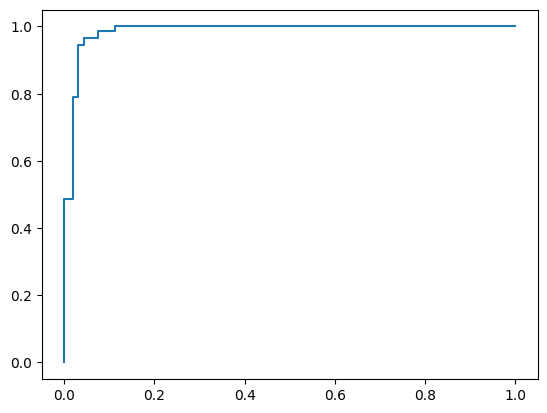

In [ ]:
fpr,tpr, threshold = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
